# Fraud Detection Using a Neural Autoencoder for Credit Card dataset

### Importing required libraries
- For ploting we use matplotlib and seaborn moduels
- For reading csv data, we use pandas
- For consturcting autoencoder, we use tensorflow and keras modules
- Sklearn Module for data processing

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

2024-05-02 03:25:30.026297: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 03:25:30.265198: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 03:25:31.090913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data Exploration

Our data contains 284807 transactions out of which 492 are fraud. All variables of the dataset are numerical. The attribues V1, V2, ... , V29 are principle components and Amount

In [2]:
df = pd.read_csv("creditcard.csv")
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

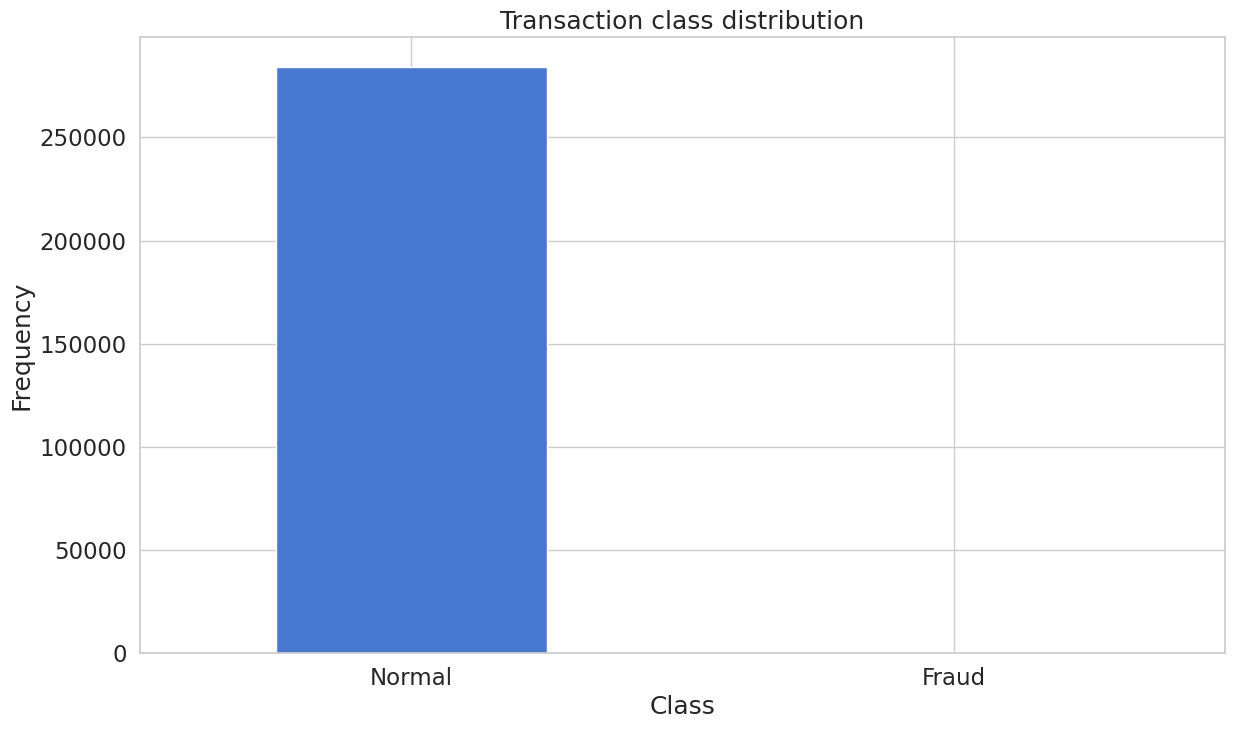

In [4]:
count_classes = pd.Series(df['Class']).value_counts()
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

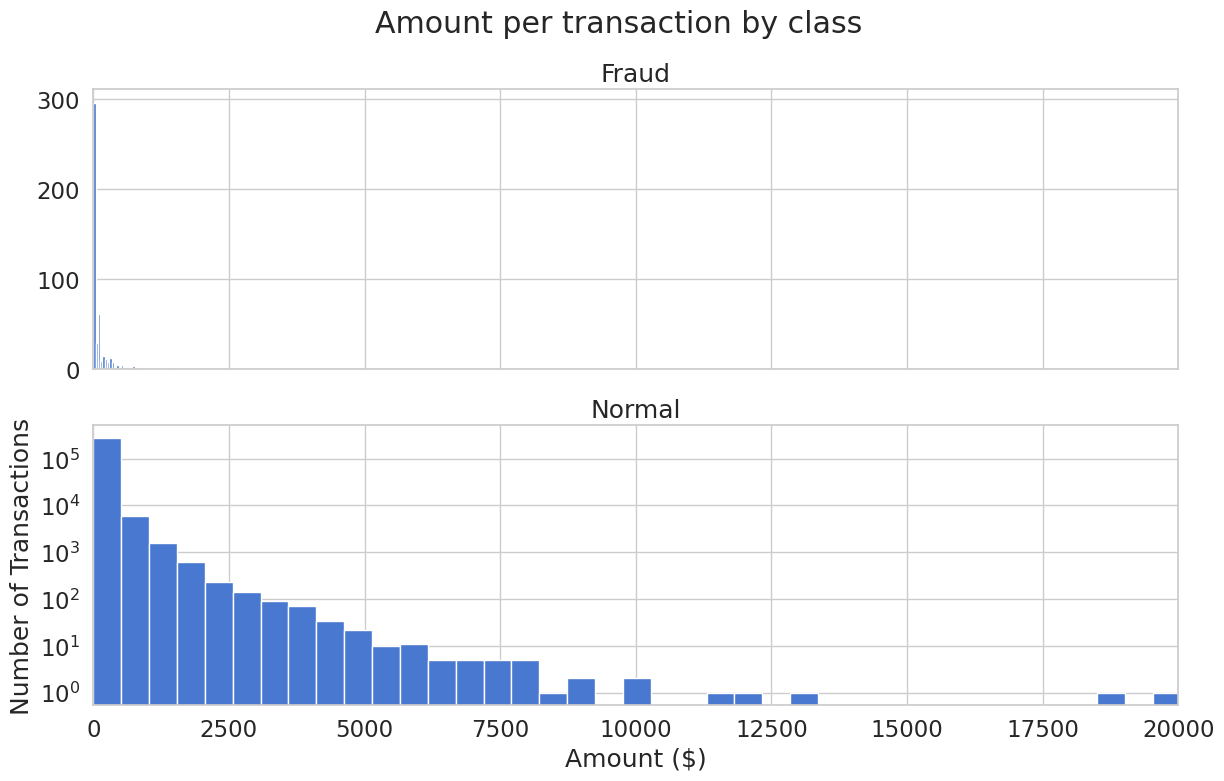

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

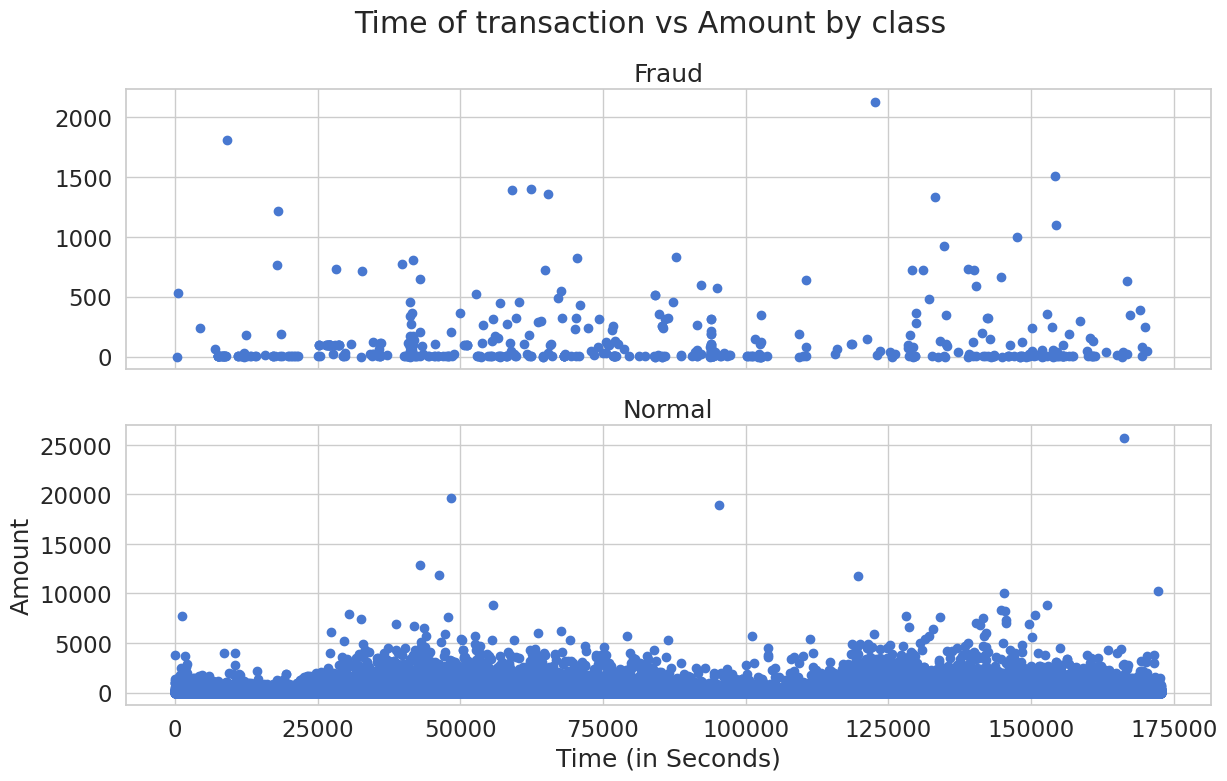

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Preparing Data

- For this, we do not need time attribute and we scale the data with StandardScaler
- Next we would prepare the training data

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Add a small constant to handle zeros (e.g., 1e-9)
small_constant = 1e-9

# Change time field to log scale, handling zeros
df['Time'] = np.log(df['Time'] + small_constant)

# Change amount field to log scale, handling zeros
df['Amount'] = np.log(df['Amount'] + small_constant)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,11.252233,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.853093,0.001727
std,0.822451,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.656938,0.041527
min,-20.723266,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-20.723266,0.000000
25%,10.900464,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.722767,0.000000
50%,11.346776,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.091042,0.000000
75%,11.844532,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.345946,0.000000
max,12.059844,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153902,1.000000


In [10]:
#data = df.drop(['Time'], axis=1)
data = df
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 30)

## Building the Model

- Our autoencoder uses 4 fully connected layers with 14, 7, 7 and 30 neurons respectively
- The first two layers are encoders.
- The first encoder takes input and encode it using Dense functions imported from keras. Then it is passed to second encoding layer
- The second encoding layer would again encode it dimension 7
- The next two layers are decoders the take the resultant from last encoding layer and pass thourgh each decoding layer
- The resultant output of the final decoder would be of again the original dimension
- Additionally we use L1 regularization and relu and tanh activation functions for our layers

  ### The below is the corresponding model

In [11]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

## Reconstruction Error

We optimize the parameters of our model in such a way that reconstruction error is minimized. Here we used mean squared error as our reconstruction error

Now we compile our autoencoder and train our model for 50 epochs with a batch size of 32 and save the best performing model to a file model.keras.

In [12]:
nb_epoch = 50
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.keras",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 970us/step - accuracy: 0.9322 - loss: 2.0163 - val_accuracy: 0.9975 - val_loss: 1.0581
Epoch 2/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 7s 913us/step - accuracy: 0.9977 - loss: 0.9897 - val_accuracy: 0.9974 - val_loss: 1.0001
Epoch 3/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 7s 955us/step - accuracy: 0.9978 - loss: 0.9415 - val_accuracy: 0.9974 - val_loss: 0.9657
Epoch 4/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9978 - loss: 0.9141 - val_accuracy: 0.9975 - val_loss: 0.9391
Epoch 5/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9975 - loss: 0.8943 - val_accuracy: 0.9975 - val_loss: 0.9242
Epoch 6/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9978 - loss: 0.8698 - val_accuracy: 0.9975 - val_loss: 0.8837
Epoch 7/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9978 - loss: 0.8357 - val_accuracy: 0.9976 - val_loss: 0.8758
Epoch 8/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9977 - loss: 0.8

Load the saved model

In [13]:
autoencoder = load_model('model.keras')

## Evaluation

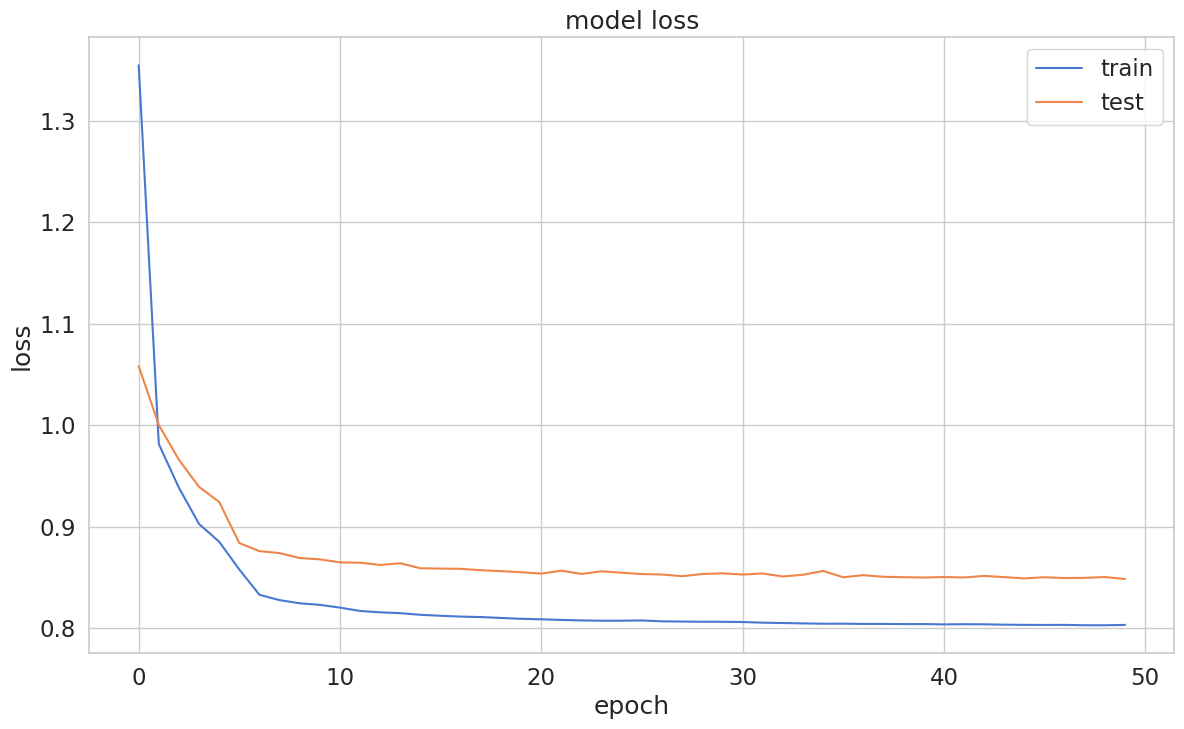

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The reconstruction error on our training data is converging

In [16]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.838293,0.001720
std,3.534655,0.041443
min,0.042777,0.000000
25%,0.255088,0.000000
50%,0.412214,0.000000
75%,0.647062,0.000000
max,265.865684,1.000000


In [17]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, accuracy_score, precision_score,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

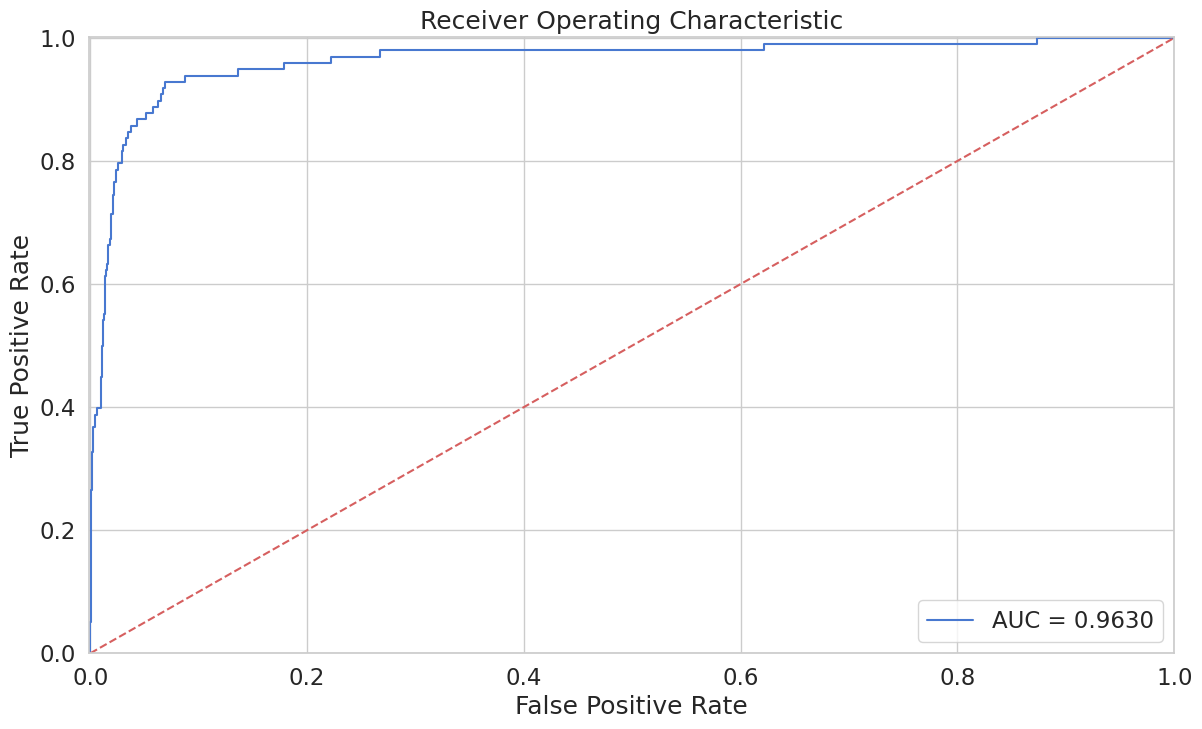

In [18]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Precision = True Positives/(True Positives + False Positives)

Precision measures the relevancy of obtained results. Recall, on the other hand, measures how many relevant results are returned. 

Recall = True positive/(True Positive + False Negatives)

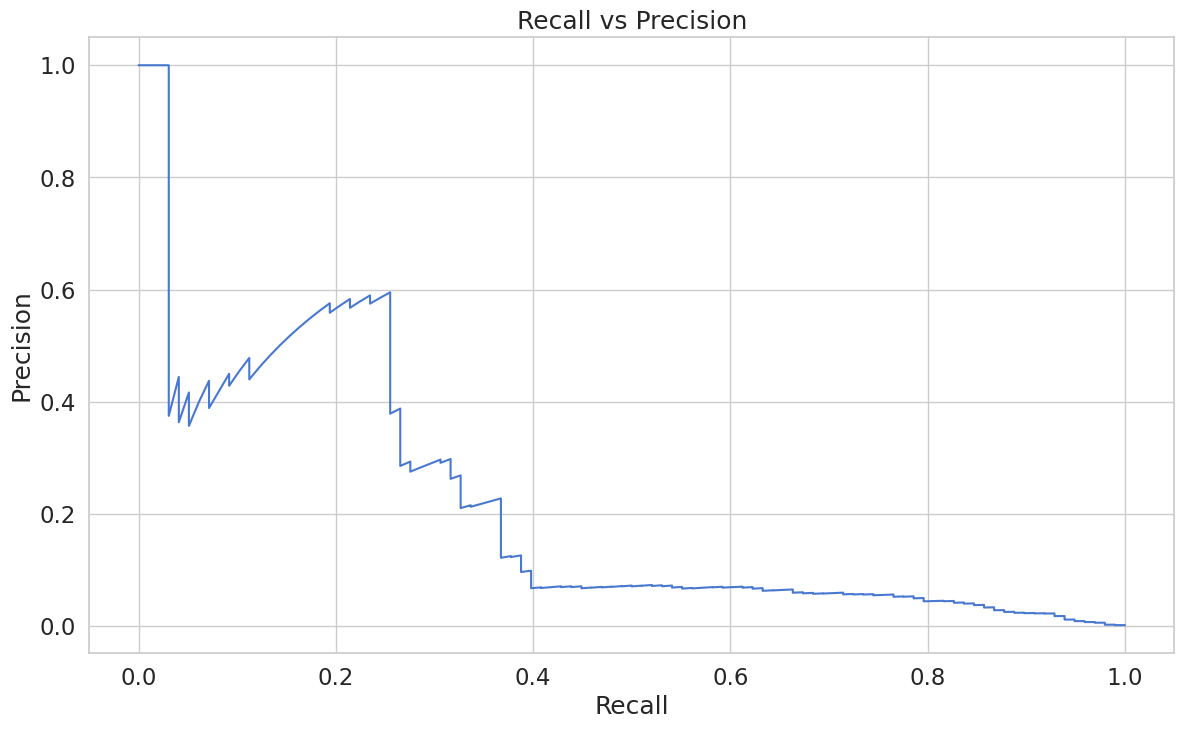

In [20]:
threshold = 2.9
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall)

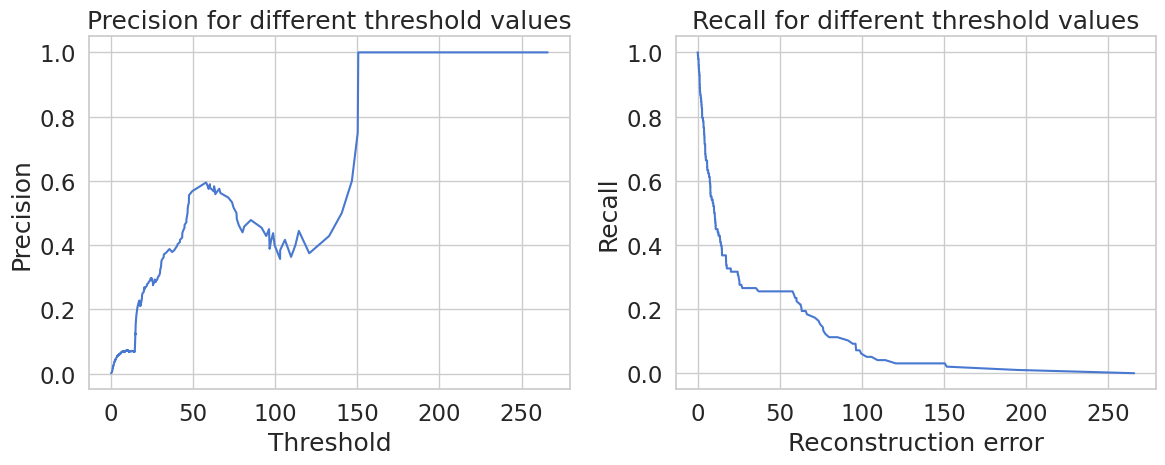

In [21]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot precision
axs[0].plot(th, precision[1:], 'b', label='Threshold-Precision curve')
axs[0].set_title('Precision for different threshold values')
axs[0].set_xlabel('Threshold')
axs[0].set_ylabel('Precision')

# Plot recall
axs[1].plot(th, recall[1:], 'b', label='Threshold-Recall curve')
axs[1].set_title('Recall for different threshold values')
axs[1].set_xlabel('Reconstruction error')
axs[1].set_ylabel('Recall')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

From above graphs, we can see that reconstruction error is increasing with precision and decreasing with recall

In [22]:
# Compute accuracy
accuracy = accuracy_score(error_df.true_class, y_pred)

# Compute precision, recall, and F1 score
precision = precision_score(error_df.true_class, y_pred)
recall = recall_score(error_df.true_class, y_pred)
f1 = f1_score(error_df.true_class, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9709279870791053
Precision: 0.045507584597432905
Recall: 0.7959183673469388
F1 Score: 0.08609271523178809


The above are the accuray , precision score, recall score and F1 score respectively
- Accuracy measures the overall correctness of the predictions.
- Precision measures the proportion of true positive predictions among all positive predictions.
- Recall measures the proportion of true positive predictions among all actual positives.
- F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics.

Hence we see that our model has 97% accuracy, and Our model has Good recall but somewhat bad precision. That is amont all positive predictions, we are giving false positives.

### Prediction

In order to predict whether or not a new/unseen transaction is normal or fraudulent, we’ll calculate the reconstruction error from the transaction data itself. If the error is larger than a predefined threshold, we’ll mark it as a fraud (since our model should have a low error on normal transactions).

In [ ]:
threshold = 2.9

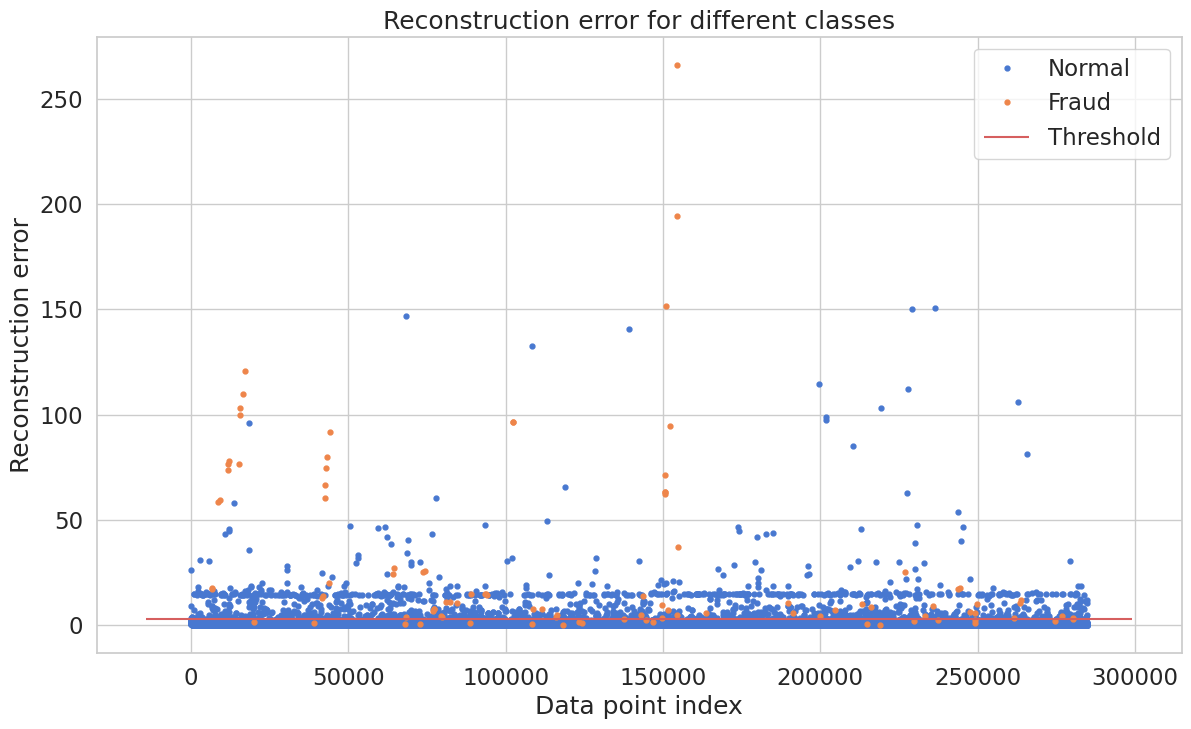

In [23]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

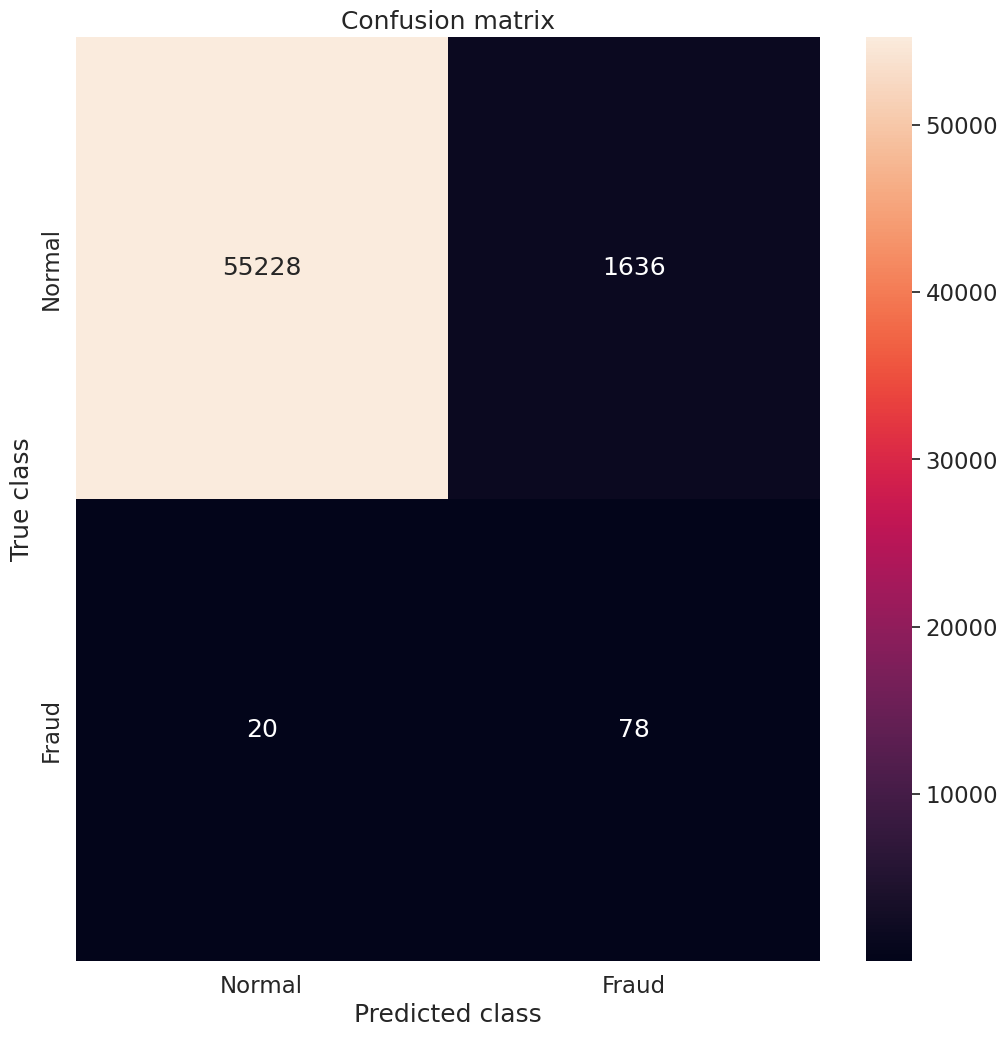

In [24]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()